In [1]:
import torch
import os
import re
import sys
import cv2
from config_reader import config_reader
import util
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
from torch import nn
from scipy.ndimage.filters import gaussian_filter

In [2]:
from PoseEstimator.PoseEstimation import model, process_image, process_output

In [3]:
torch_device = torch.device('cuda:3')

In [4]:
model_pose = model(pretrained=True)
model_pose = model_pose.to(torch_device)
model_pose.eval() ;

In [26]:
test_image = './sample_image/v.jpg'

In [27]:
heatmap_avg, paf_avg, segm = process_image(model_pose, test_image, torch_device)

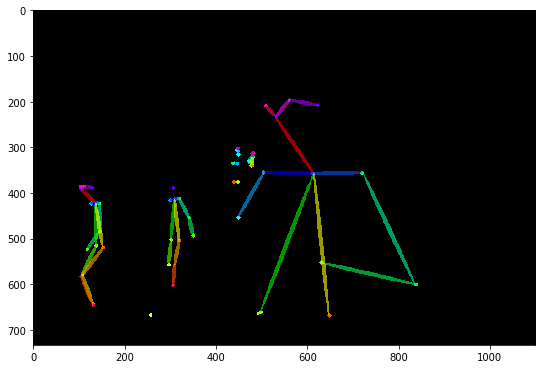

In [28]:
skeleton = process_output(heatmap_avg, paf_avg, test_image, skeleton=True)
skeleton = skeleton.astype(np.uint8)
b,g,r = cv2.split(skeleton)
skeleton = cv2.merge((r,g,b))

plt.figure(figsize=(9,9))
plt.imshow(skeleton)


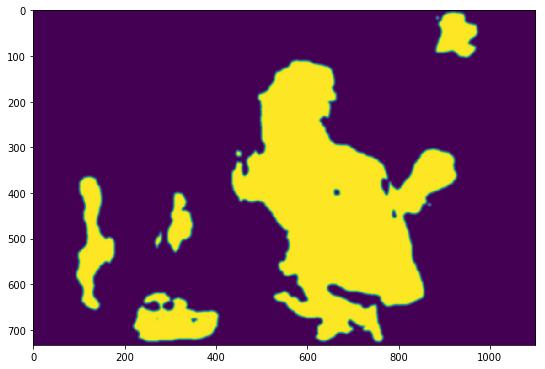

In [29]:
prediction = nn.Upsample((skeleton.shape[0], skeleton.shape[1]), mode='bilinear', align_corners=True)(segm)      
pred_segm = nn.Softmax(dim=1)(prediction)[0,1].cpu().data.numpy()

segm_alpha = ((pred_segm[:,:,None]>0.65)*255).astype(np.uint8)[:,:,0]
segm_alpha = gaussian_filter(segm_alpha, sigma=2)


plt.figure(figsize=(9,9))
plt.imshow(segm_alpha)

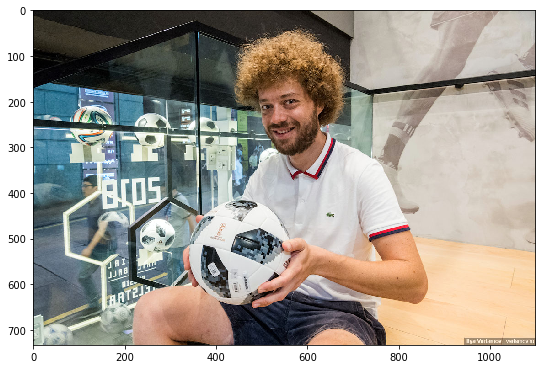

In [30]:
plt.figure(figsize=(9,9))
img = plt.imread(test_image)
plt.imshow(img)

In [31]:
img_a = np.dstack([img, segm_alpha])

(-0.5, 1099.5, 732.5, -0.5)

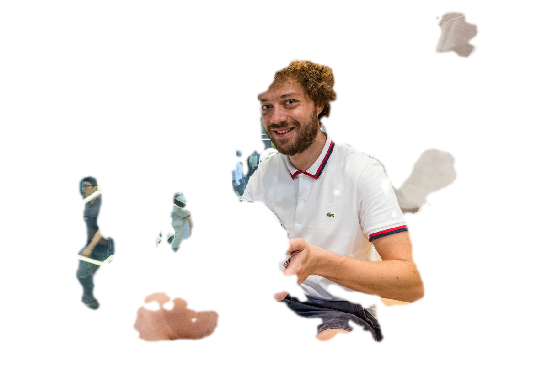

In [32]:
plt.figure(figsize=(9,9))
plt.imshow(img_a)
plt.axis('off')

In [33]:
skeleton_a = np.dstack((skeleton, ((skeleton.sum(2)>0)*255)[:,:,None])).astype(np.uint8)

In [34]:
img_skeleton_segm = cv2.addWeighted(img_a, 1, skeleton_a, 5, 0)

(-0.5, 1099.5, 732.5, -0.5)

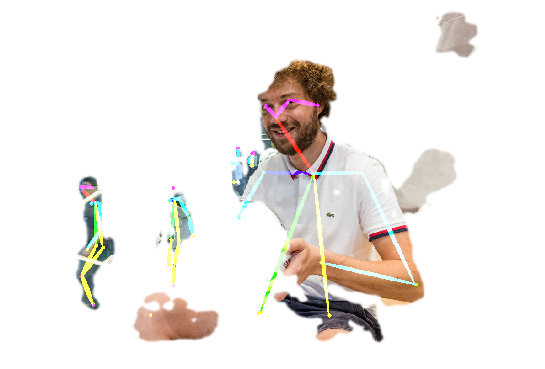

In [35]:
plt.figure(figsize=(9,9))
plt.imshow(img_skeleton_segm)
plt.axis('off')

In [72]:
np.uint8(12313)

25